In [32]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   

In [71]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("D:/datascience Excelr/class docs and assignments/Assignments/In progress/Clustering/Crime data/crime_data.csv");

print(df.head())
df  

        State  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [85]:
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [73]:
#df.city=df.city.astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [74]:
df['State_code']=df.State.astype('category').cat.codes

In [75]:
df.head()

,State,Murder,Assault,UrbanPop,Rape,State_code
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,4


In [76]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
 5   State_code  50 non-null     int8   
dtypes: float64(2), int64(2), int8(1), object(1)
memory usage: 2.1+ KB
None


In [42]:
df['State_code'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int8)

In [43]:
#df1 = df.drop(['State'],axis=1)   

In [77]:
array=df.values
array  

array([['Alabama', 13.2, 236, 58, 21.2, 0],
       ['Alaska', 10.0, 263, 48, 44.5, 1],
       ['Arizona', 8.1, 294, 80, 31.0, 2],
       ['Arkansas', 8.8, 190, 50, 19.5, 3],
       ['California', 9.0, 276, 91, 40.6, 4],
       ['Colorado', 7.9, 204, 78, 38.7, 5],
       ['Connecticut', 3.3, 110, 77, 11.1, 6],
       ['Delaware', 5.9, 238, 72, 15.8, 7],
       ['Florida', 15.4, 335, 80, 31.9, 8],
       ['Georgia', 17.4, 211, 60, 25.8, 9],
       ['Hawaii', 5.3, 46, 83, 20.2, 10],
       ['Idaho', 2.6, 120, 54, 14.2, 11],
       ['Illinois', 10.4, 249, 83, 24.0, 12],
       ['Indiana', 7.2, 113, 65, 21.0, 13],
       ['Iowa', 2.2, 56, 57, 11.3, 14],
       ['Kansas', 6.0, 115, 66, 18.0, 15],
       ['Kentucky', 9.7, 109, 52, 16.3, 16],
       ['Louisiana', 15.4, 249, 66, 22.2, 17],
       ['Maine', 2.1, 83, 51, 7.8, 18],
       ['Maryland', 11.3, 300, 67, 27.8, 19],
       ['Massachusetts', 4.4, 149, 85, 16.3, 20],
       ['Michigan', 12.1, 255, 74, 35.1, 21],
       ['Minnesota', 2.7, 

In [45]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.69774938],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.62845348],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -1.55915759],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.4898617 ],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -1.4205658 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -1.35126991],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.28197402],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.21267813],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -1.14338223],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.07408634],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.00479045],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.93549455],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.86619866],
       [-0.13637203, -0.70012057, -0.0

In [86]:
dbscan = DBSCAN(eps=0.45, min_samples=5)
dbscan.fit(X)                

DBSCAN(eps=0.45)

In [87]:
#Noisy samples are given the label -1.
dbscan.labels_     

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [89]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 
cl.head()

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1


In [82]:
cl
pd.set_option("display.max_rows", None) 

In [83]:
cl   

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [84]:
df1 = pd.concat([df,cl],axis=1) 
df1     

,State,Murder,Assault,UrbanPop,Rape,State_code,cluster
0,Alabama,13.2,236,58,21.2,0,-1
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,2,-1
3,Arkansas,8.8,190,50,19.5,3,-1
4,California,9.0,276,91,40.6,4,-1
5,Colorado,7.9,204,78,38.7,5,-1
6,Connecticut,3.3,110,77,11.1,6,-1
7,Delaware,5.9,238,72,15.8,7,-1
8,Florida,15.4,335,80,31.9,8,-1
9,Georgia,17.4,211,60,25.8,9,-1


In [66]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic') 

Text(0.5, 1.0, 'Clusters using DBScan')

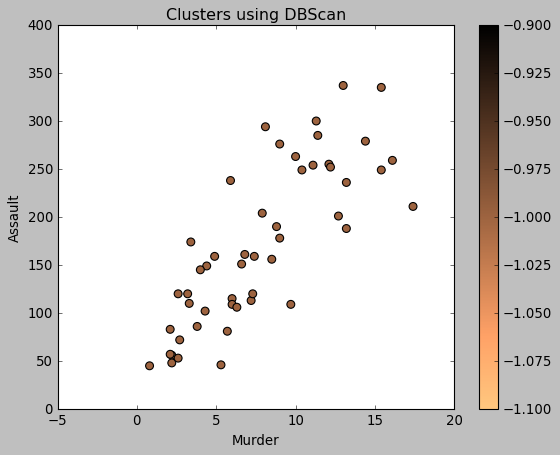

In [67]:
df1.plot(x="Murder",y ="Assault",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')   

In [68]:
dl = dbscan.labels_   

In [69]:
dl

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [70]:
from sklearn import metrics
sklearn.metrics.silhouette_score(X, dl) 
 

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [92]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)  

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [93]:
y_kmeans

array([1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [94]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

,Kcluster
0,1
1,1
2,1
3,0
4,1
5,1
6,2
7,2
8,1
9,1


In [95]:
df2 = pd.concat([df1,cl1],axis=1) 
df2 

,State,Murder,Assault,UrbanPop,Rape,State_code,cluster,Kcluster
0,Alabama,13.2,236,58,21.2,0,-1,1
1,Alaska,10.0,263,48,44.5,1,-1,1
2,Arizona,8.1,294,80,31.0,2,-1,1
3,Arkansas,8.8,190,50,19.5,3,-1,0
4,California,9.0,276,91,40.6,4,-1,1
5,Colorado,7.9,204,78,38.7,5,-1,1
6,Connecticut,3.3,110,77,11.1,6,-1,2
7,Delaware,5.9,238,72,15.8,7,-1,2
8,Florida,15.4,335,80,31.9,8,-1,1
9,Georgia,17.4,211,60,25.8,9,-1,1


Text(0.5, 1.0, 'Clusters using KMeans')

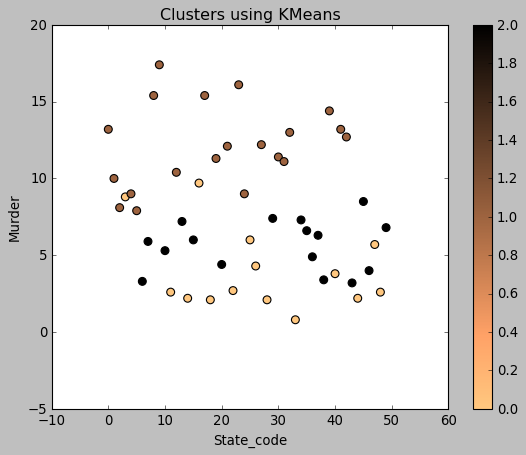

In [98]:
df2.plot(x="State_code",y ="Murder",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')   

In [99]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.30813622648945616